<a href="https://colab.research.google.com/github/aishwaryage/p4p/blob/main/week1/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project #4**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

Make sure you've created a copy of this notebook and the provided data file 'pBs_2body_decay.txt' in your Python4Physics folder.

In [4]:
# Let's get our data!
filename = 'pBs_2body_decay.txt'
q0s = np.loadtxt(filename)
#const_data = np.loadtxt('/content/drive/My Drive/Python4Physics/const_data.txt')
print("q0s = ", q0s[0:10])
print("type(q0s) = ", type(q0s))
print("shape(q0s) = ", np.shape(q0s))


# These q0s are our momentum measurements

q0s =  [0.7338822  0.73414999 0.73213688 0.73275698 0.73319379 0.73484167
 0.73355556 0.73283873 0.73216609 0.73458736]
type(q0s) =  <class 'numpy.ndarray'>
shape(q0s) =  (1000,)


Is the data Gaussian? It should be! If the data is "normally distributed", it will have the shape of a Gaussian -- see https://en.wikipedia.org/wiki/Normal_distribution.

Let's check. You can just run this cell.

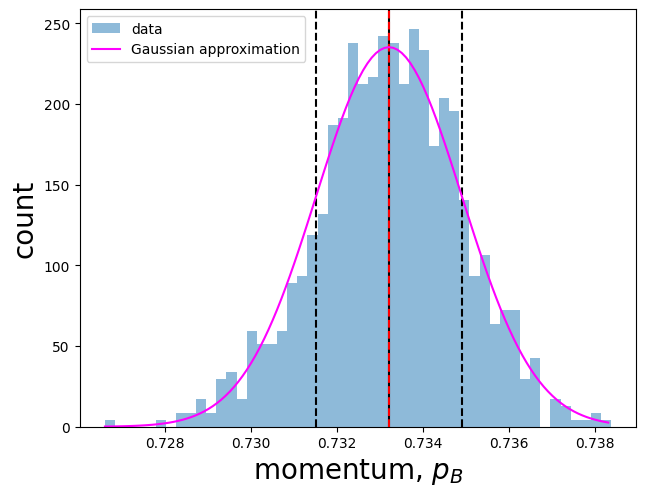

In [5]:

fig = plt.figure()
''' next, we create a axes canvas.  The 4 numbers represent
    ax = plt.axes([x0, y0, dx, dy])
    - x0: width from left to start canvas (in units of 0 - 1)
    - y0: height from bottome to start canvas
    - dx: width of canvas - NOTE, x0 + dx <= 1
    - dy: height of canvas - NOTE, y0 + dy <= 1
'''
ax    = plt.axes([0.12, 0.12, 0.87, 0.87])
''' Now let us plot the histogram
    - Nbins  : the number of bins to use
    - alpha  : a parameter taking the value [0, 1] that controls opacity
    - ;      : the semi-colon at the end prevents the function from printing
               values of the histogram - try removing it
    - density: it True, normalize so that int(hist) = 1

'''
Nbins = 50
ax.hist(q0s, bins=Nbins, alpha=.5, density=True, label='data');

# let us make some axis labels
ax.set_ylabel(r'count', fontsize=20);
ax.set_xlabel(r'momentum, $p_B$', fontsize=20);

# plot the mean value
ax.axvline(q0s.mean(), color='k')
# plot the standard deviation
ax.axvline(q0s.mean()-q0s.std(), color='k', linestyle='--')
ax.axvline(q0s.mean()+q0s.std(), color='k', linestyle='--')

# median
i_sort = q0s.argsort() # creates an array of the indices for values of q0s arranged in an ascending order
median = q0s[i_sort][len(q0s)//2] # take the index of the middle value in the sorted array of indices and take that indexed q0
ax.axvline(q0s.mean(), color='r', linestyle='--')

# plot Gaussian [normal] distrubution
''' If the data is "normally distributed", it will have the shape of a Gaussian
    see https://en.wikipedia.org/wiki/Normal_distribution

    prob(x) = Norm * exp( -(x - x_mean) / 2 / sigma**2)

    solve for Norm by

    1 = integral[-inf, inf] dx prob(x)

    Norm = 1 / sqrt(2 * pi * sigma**2)
'''
# create linespace
n_plot = 10000
x_min  = min(q0s)
x_max  = max(q0s)
x_plot = np.arange(x_min, x_max + (x_max-x_min)/n_plot, 1/n_plot)

def mom_dist(x, x_mean, x_sigma):
  Norm = 1 / np.sqrt( (2 * np.pi * x_sigma**2) )
  prob = Norm * np.exp( -(x - x_mean)**2 / 2 / x_sigma**2)

  return prob

gauss = mom_dist(x_plot, q0s.mean(), q0s.std())
ax.plot(x_plot, gauss, color='magenta', label='Gaussian approximation')

# plot our legend
ax.legend(loc=2)

Now we want to calculate and plot the unknown mass m_c.
Remember, the necessary equations and variables are in the slides!

In [6]:
# Define missing_mass function

def missing_mass(mA, mB, q0s):
  # Calculate the value inside the square root
  sqrt_arg = mA**2 - 2*mA*np.sqrt(mB**2+q0s**2) + mB**2

  return np.sqrt(sqrt_arg)

Mean of mC =  0.414394288933675
Standard deviation of mC =  0.005218032668386297


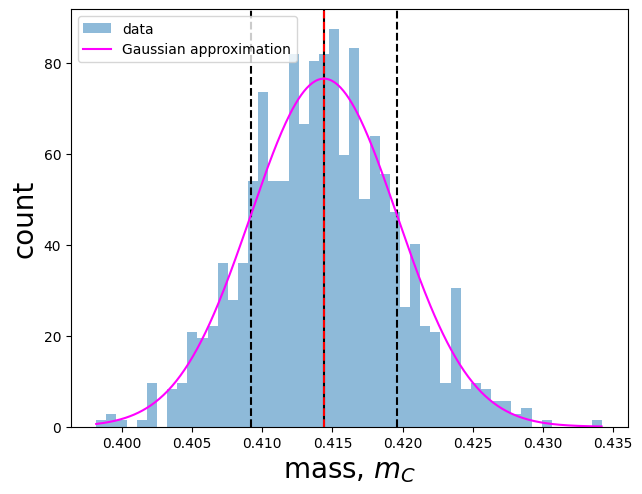

In [8]:
# Plot the mass distribution histogram like we did above
# The data text file wasn't available in the drive. Hence used random values for mA & mB
mC = missing_mass(1.98, 0.87, q0s)

# Filter out NaN values from mC before plotting
mC = mC[~np.isnan(mC)]

fig = plt.figure()
''' next, we create a axes canvas.  The 4 numbers represent
    ax = plt.axes([x0, y0, dx, dy])
    - x0: width from left to start canvas (in units of 0 - 1)
    - y0: height from bottome to start canvas
    - dx: width of canvas - NOTE, x0 + dx <= 1
    - dy: height of canvas - NOTE, y0 + dy <= 1
'''
ax    = plt.axes([0.12, 0, 0.87, 0.87])
''' Now let us plot the histogram
    - Nbins  : the number of bins to use
    - alpha  : a parameter taking the value [0, 1] that controls opacity
    - ;      : the semi-colon at the end prevents the function from printing
               values of the histogram - try removing it
    - density: it True, normalize so that int(hist) = 1

'''
Nbins = 50
ax.hist(mC, bins=Nbins, alpha=.5, density=True, label='data');

# let us make some axis labels
ax.set_ylabel(r'count', fontsize=20);
ax.set_xlabel(r'mass, $m_C$', fontsize=20);

# plot the mean value
ax.axvline(mC.mean(), color='k')
# plot the standard deviation
ax.axvline(mC.mean()-mC.std(), color='k', linestyle='--')
ax.axvline(mC.mean()+mC.std(), color='k', linestyle='--')

# median
i_sort = mC.argsort() # creates an array of the indices for values of q0s arranged in an ascending order
median = mC[i_sort][len(mC)//2] # take the index of the middle value in the sorted array of indices and take that indexed q0
ax.axvline(mC.mean(), color='r', linestyle='--')

# plot Gaussian [normal] distrubution
''' If the data is "normally distributed", it will have the shape of a Gaussian
    see https://en.wikipedia.org/wiki/Normal_distribution

    prob(x) = Norm * exp( -(x - x_mean) / 2 / sigma**2)

    solve for Norm by

    1 = integral[-inf, inf] dx prob(x)

    Norm = 1 / sqrt(2 * pi * sigma**2)
'''
# create linespace
n_plot = 10000
x_min  = min(mC)
x_max  = max(mC)
x_plot = np.arange(x_min, x_max + (x_max-x_min)/n_plot, 1/n_plot)

def mom_dist(x, x_mean, x_sigma):
  Norm = 1 / np.sqrt( (2 * np.pi * x_sigma**2) )
  prob = Norm * np.exp( -(x - x_mean)**2 / 2 / x_sigma**2)

  return prob

gauss = mom_dist(x_plot, mC.mean(), mC.std())
ax.plot(x_plot, gauss, color='magenta', label='Gaussian approximation')

# plot our legend
ax.legend(loc=2)
print("Mean of mC = ", mC.mean())
print("Standard deviation of mC = ", mC.std())